USC ID: 8312646237

There are 9569 rows and 5 columns in this dataset. The first 4 columns represent the independent variables(our predictors, while the last one is our class (the target that we want to predict).

In [2]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


df= pd.read_excel('/Users/phuongqn/Desktop/INF552/Homework/HW2Data/CCPP/Folds5x2_pp.xlsx', sheet_name="Sheet5")

#df.head()
print('Number of columns:', len(df.columns))
print('Number of rows:', len(df))



ModuleNotFoundError: No module named 'sklearn'

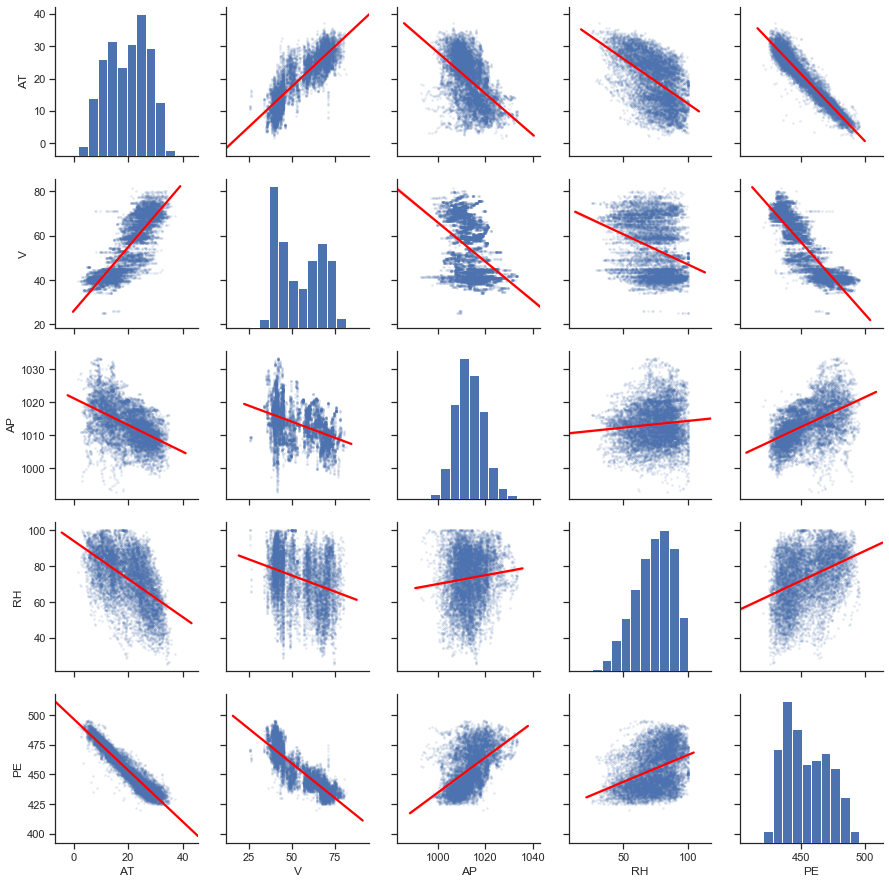

In [2]:
sns.set(style="ticks", color_codes=True)
plt.show()
pw= sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 's':3}})
#pw= pw.map_diag(plt.hist)
#pw= pw.map_offdiag(plt.scatter)


In [3]:
col_mean=[]
col_med=[]
col_range = []
col_first =[]
col_third=[]
col_iqr=[]

for column in df:
    var_mean=(df[column].describe()['mean'])
    var_med=(df[column].describe()['50%'])
    var_range=df[column].describe()['max'] - df[column].describe()['min']
    var_first=df[column].describe()['25%']
    var_third=df[column].describe()['75%']
    var_iqr=df[column].describe()['75%']-df[column].describe()['25%']

    col_mean.append(var_mean)
    col_med.append(var_med)
    col_range.append(var_range)
    col_first.append(var_first)
    col_third.append(var_third)
    col_iqr.append(var_iqr)

var_names=['AT', 'V', 'AP', 'RH', 'PE']
d=pd.DataFrame({'Variables': var_names,  'Mean': col_mean, 
                'Median': col_med,'Range':col_range,'First Quartile': col_first, 
                'Third Quartile': col_third, 'IQR': col_iqr})

d

,Variables,Mean,Median,Range,First Quartile,Third Quartile,IQR
0,AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
1,V,54.305804,52.080,56.20,41.7400,66.54,24.8000
2,AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
3,RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
4,PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


coefficient of determination: 0.8989475964148237
b_0 (Intercept): 497.0341198927667
b_1 (Slope): [-2.17131996]
predicted response:
[478.92531144 445.70411607 432.45906433 ... 462.31471376 458.71032262
 445.61726328]
-2.1713199585177914


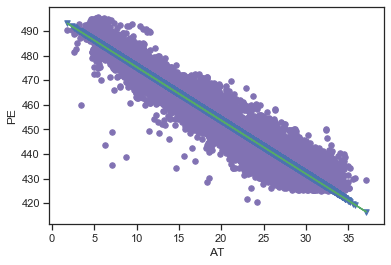

coefficient of determination: 0.7565177870683979
b_0 (Intercept): 517.801526308386
b_1 (Slope): [-1.16813513]
predicted response:
[470.1766572  449.47730276 451.33463761 ... 467.17454992 447.86527628
 457.87619432]
-1.168135126555713


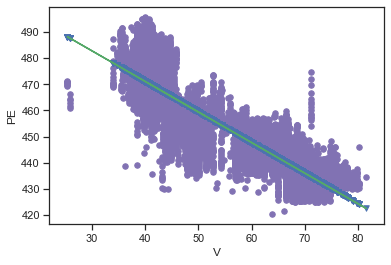

coefficient of determination: 0.2687686564110675
b_0 (Intercept): -1055.260988984439
b_1 (Slope): [1.48987167]
predicted response:
[450.76089335 451.59522149 445.26326688 ... 455.76686218 462.29250011
 452.28056246]
1.4898716733991135


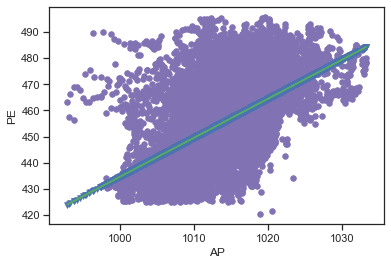

coefficient of determination: 0.151939440231176
b_0 (Intercept): 420.9617661554839
b_1 (Slope): [0.4556501]
predicted response:
[461.97483186 454.77100374 440.05806194 ... 456.8032032  464.08904833
 453.42227944]
0.4556501022629807


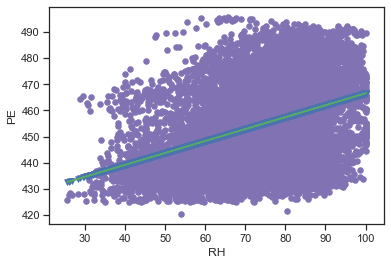

[-2.1713199585177914, -1.168135126555713, 1.4898716733991135, 0.4556501022629807]
['AT', 'V', 'AP', 'RH']


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pred_d=df.copy()
targ_d=pred_d.pop('PE')
# pred_d=df.drop(columns=['PE'])

coef_list=[]
pred=[]
for column in pred_d:
    a=pred_d[column].values.reshape(-1,1)
    model = LinearRegression().fit(a, targ_d)
    r_sq = model.score(a, targ_d)
    y_pred = model.predict(a)
    print('coefficient of determination:', r_sq)
    print('b_0 (Intercept):', model.intercept_)
    print('b_1 (Slope):', model.coef_)
    result = np.asscalar(model.coef_)
    print('predicted response:', y_pred, sep='\n')
    print(result)
    coef_list.append(result) 
    pred.append(column)
    
    plt.scatter(a, targ_d, color = "m", 
               marker = "o", s = 30) 
    plt.scatter(a, y_pred, color = "b", 
               marker = "v", s = 30) 
    plt.plot(a, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel(column) 
    plt.ylabel('PE') 
  
    # function to show plot 
    plt.show() 

print(coef_list)
print(pred)  


In [5]:
import statsmodels.api as sm
for column in pred_d:
    #a=pred_d[column].values.reshape(-1,1)
    X = sm.add_constant(pred_d[column])
    est = sm.OLS(targ_d, X).fit()
    print(est.summary())
    

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:30:36   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


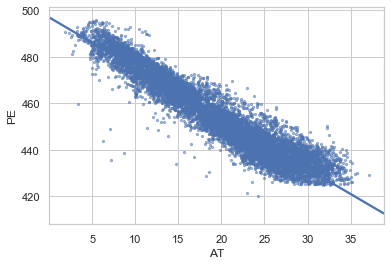

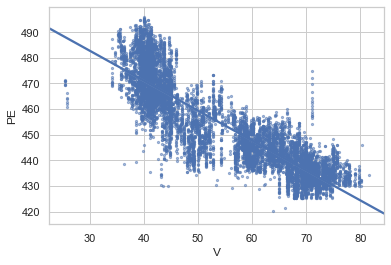

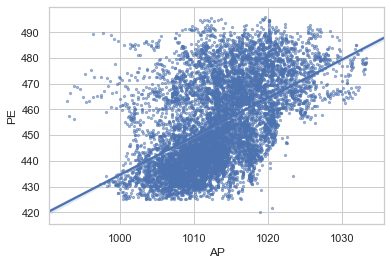

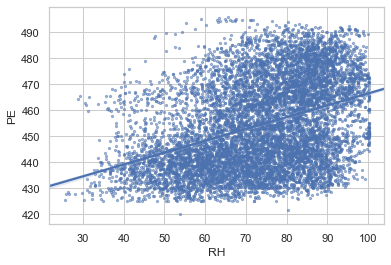

In [6]:
for i in range(len(df.columns)-1):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots()
    sns.regplot(y=df['PE'], x=df.columns[i], data=df, scatter_kws={'alpha': 0.5, 's':5})

d)

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(pred_d, targ_d, test_size=0.2, 
                                                    random_state=1)
reg = LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
y_t_pred=reg.predict(X_test)
  
# regression coefficients 
print('Coefficients: \n', reg.coef_)
print('Bias: \n', reg.intercept_)
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
print(y_t_pred)

Coefficients: 
 [-1.9757504  -0.23298939  0.06693707 -0.15901258]
Bias: 
 449.67450811894895
Variance score: 0.931485529163037
[459.35746293 433.94323068 474.86629635 ... 445.69705545 445.3988871
 434.67267119]


In [8]:
# train the model using the data sets 
reg1=reg.fit(pred_d, targ_d) 
y_prd=reg1.predict(pred_d)

print('Coefficients: \n', reg1.coef_)
print('Bias: \n', reg1.intercept_)
print('Variance score: {}'.format(reg.score(pred_d, y_prd))) 
print(y_prd)

Coefficients: 
 [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
Bias: 
 454.6092743153102
Variance score: 1.0
[477.10951555 445.24216782 438.39097945 ... 463.38288783 453.9782158
 447.34132467]


In [9]:
X1 = sm.add_constant(pred_d)
est1 = sm.OLS(targ_d, X1).fit()
print(est1.summary())
est1.pvalues

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:30:53   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const     0.000000e+00
AT        0.000000e+00
V        4.375305e-215
AP        5.507109e-11
RH       3.104584e-293
dtype: float64

Since p values for all predictors are 0, which is less than 0.05 or even 0.01, we can reject null hypothesis for all 

In [10]:
coef_d=pd.DataFrame({'Predictor': pred, 'SLG Coef': coef_list, 'MLG Coef': reg.coef_})
coef_d

,Predictor,SLG Coef,MLG Coef
0,AT,-2.171320,-1.977513
1,V,-1.168135,-0.233916
2,AP,1.489872,0.062083
3,RH,0.455650,-0.158054


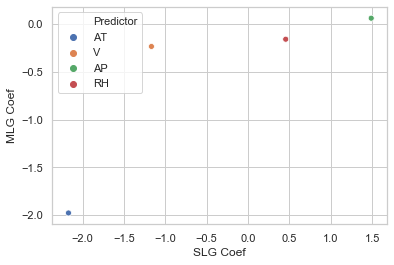

In [11]:
coef_plt = sns.scatterplot(x="SLG Coef", y="MLG Coef", data=coef_d, hue="Predictor")

In [12]:
from sklearn.preprocessing import PolynomialFeatures
for column in pred_d:
    a=pred_d[column].values.reshape(-1,1)
    a_ = PolynomialFeatures(degree=3, include_bias = False).fit_transform(a)
    model2=LinearRegression().fit(a_, targ_d)
    r_sq = model2.score(a_, targ_d)
    y_pred_new = model2.predict(a_)
    print('coefficient of determination:', r_sq)
    print('b_0 (Intercept):', model2.intercept_)
    print('b_1 (Slope):', model2.coef_)
    print('predicted response:', y_pred_new, sep='\n')

coefficient of determination: 0.9118826627742723
b_0 (Intercept): 492.72814333734254
b_1 (Slope): [-0.61034571 -0.12513818  0.00267485]
predicted response:
[480.48546389 443.7041666  434.25528182 ... 461.9090373  457.6795151
 443.62257572]
coefficient of determination: 0.7750219775589421
b_0 (Intercept): 554.1468490634376
b_1 (Slope): [-2.14437732e+00 -2.71228490e-03  1.34357110e-04]
predicted response:
[471.31730441 446.32799554 448.10172668 ... 467.0526348  444.87392569
 455.14137463]
coefficient of determination: 0.2975434657766842
b_0 (Intercept): 5236219.810543397
b_1 (Slope): [-1.54608657e+04  1.52162521e+01 -4.99115979e-03]
predicted response:
[448.65920626 449.61484655 443.8690339  ... 454.96594695 464.03674186
 450.4338886 ]
coefficient of determination: 0.15374253544345984
b_0 (Intercept): 468.4135359711351
b_1 (Slope): [-1.72921131e+00  3.21451721e-02 -1.52187969e-04]
predicted response:
[462.21896997 454.91420357 441.20064323 ... 457.21870489 463.67485284
 453.34170755]


In [13]:
for column in pred_d:
    b=pred_d[column].values.reshape(-1,1)
    b_ = PolynomialFeatures(3).fit_transform(b)
    X4 = sm.add_constant(b_)
    est4 = sm.OLS(targ_d, X4).fit()
    print(column, est4.summary())
    
    

AT                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:33:02   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      

f) Since V2 and V3 have pretty large p values, we can reject that there is non-linear relationship between V and PE. We accept AT, AP and RH (reject the null hypothesis for these).

In [87]:
poly= PolynomialFeatures(interaction_only= True)
X5=poly.fit_transform(pred_d)
inter_names=poly.get_feature_names(pred_d.columns)
X5_ = sm.add_constant(X5)
est5 = sm.OLS(targ_d, X5).fit()
print('Interaction pairs are: ',inter_names)
print(est5.summary())

Interaction pairs are:  ['1', 'AT', 'V', 'AP', 'RH', 'AT V', 'AT AP', 'AT RH', 'V AP', 'V RH', 'AP RH']
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:32:45   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

e) Based on the p values, we can say that there is significant interaction here. However, we can reject the null hypoethis for V, AT:V, AT:RH, V:AP

In [33]:
from sklearn.metrics import mean_squared_error
x_train, x_test, Y_train, Y_test = train_test_split(pred_d, targ_d, train_size=0.7)

In [34]:
multi_mod= sm.OLS(Y_train, sm.add_constant(x_train)).fit()
y_train_pred = multi_mod.predict(sm.add_constant(x_train))
y_test_pred = multi_mod.predict(sm.add_constant(x_test))
train_mse = multi_mod.mse_resid
test_mse = mean_squared_error(Y_test, y_test_pred)
print("Train MSE : ",train_mse)
print("Test MSE: ",test_mse)
print("Coefficient: \n", multi_mod.params)
print(multi_mod.summary())

Train MSE :  21.23881470311616
Test MSE:  19.71578836559424
Coefficient: 
 const    457.301590
AT        -1.966390
V         -0.238679
AP         0.059420
RH        -0.156975
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.147e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:21:42   Log-Likelihood:                -19733.
No. Observations:                6697   AIC:                         3.948e+04
Df Residuals:                    6692   BIC:                         3.951e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coe

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
print(y_test_pred)

9530    447.668889
4608    448.749343
4260    441.969432
267     436.393019
2001    437.807015
937     437.626820
102     445.371724
7397    459.053369
9428    444.032456
4343    435.659460
5938    453.633287
5918    449.142354
9153    441.131064
3114    446.801897
931     463.152257
7027    476.221273
2641    478.759506
7390    446.960883
7607    460.326692
1271    457.800229
8729    461.566593
9311    474.597367
159     452.732865
9359    445.672819
5712    454.520474
2443    470.741037
7356    450.891871
7031    440.881694
8645    426.288628
5184    475.120161
           ...    
5537    438.890185
840     427.630655
8878    449.324679
2105    474.417765
5714    439.402804
4517    437.673045
613     453.361984
4720    454.361485
1252    467.936446
5659    467.067492
6235    451.597188
3669    446.865713
2392    479.643983
6877    431.219061
8084    465.403167
1729    471.198432
9519    441.516055
5935    478.611595
3049    437.241636
4631    454.798552
9029    447.456348
5525    432.

In [36]:
# reg2 = LinearRegression().fit(x_train, Y_train) 
reg.fit(x_train, Y_train)
Y_t_pred=reg.predict(x_test)
Y_train_pred=reg.predict(x_train)
train_mse1 = mean_squared_error(Y_train, y_train_pred)
test_mse1 = mean_squared_error(Y_test, y_test_pred)  
# regression coefficients 
print('Coefficients: \n', reg.coef_)
print('Bias: \n', reg.intercept_)
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(x_test, Y_test))) 
print(Y_t_pred)
print('Train MSE: ', train_mse1) 
print('Test MSE: ', test_mse1)

Coefficients: 
 [-1.96638952 -0.23867891  0.05941982 -0.15697543]
Bias: 
 457.3015900428569
Variance score: 0.9310107967007607
[447.66888903 448.74934332 441.96943171 ... 434.89414274 443.23433977
 448.36864977]
Train MSE:  21.222957741265244
Test MSE:  19.71578836559424


In [37]:
poly2=PolynomialFeatures(2)
X6=poly2.fit_transform(x_train)
inter_names2=poly2.get_feature_names(x_train.columns)
X6_ = sm.add_constant(X6)
est6 = sm.OLS(Y_train, X6_).fit()
print('Interaction pairs are: ',inter_names2)
print(est6.summary())


Interaction pairs are:  ['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH', 'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2']
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7096.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:21:46   Log-Likelihood:                -19273.
No. Observations:                6697   AIC:                         3.858e+04
Df Residuals:                    6682   BIC:                         3.868e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

We have p-values >0.05 for AT, V, AT:AP, V^2, V:AP and V:RH . However, from our previous models and tests, we identified that AT, V, V:AP were statistically significant in some models and not in some. So we choose the below from previous models run and the current model AT, V, AP, RH, AT^2, AP^2, RH^2, AT:V, AT:RH, V:AP, AP:RH. 

In [38]:
#Delete AT*AP
X7 = np.delete(X6,8,1) 
#Delete V^2
X7= np.delete(X6,10,1)
#Delete V*RH
X7= np.delete(X6,12,1) 
# X7 is x_train improved

X8=poly2.fit_transform(x_test)
X9 = np.delete(X8,8,1) 
X9= np.delete(X8,10,1)
X9= np.delete(X8,12,1) 
#X9 is x_test improved

In [39]:
improved_mod = sm.OLS(Y_train,sm.add_constant(X7)).fit()
y_train_pred_improved = improved_mod.fittedvalues
y_test_pred_improved = improved_mod.predict(sm.add_constant(X9))
train_improved_mse = mean_squared_error(Y_train, y_train_pred_improved)
test_improved_mse = mean_squared_error(Y_test, y_test_pred_improved)
print("MSE values ")
print("Train data : ",train_improved_mse)
print("Test data: ", test_improved_mse)

MSE values 
Train data :  18.58974418743888
Test data:  17.282113622704255


In [40]:
x_test

,AT,V,AP,RH
9530,21.93,62.91,1013.45,74.62
4608,22.35,54.42,1012.46,75.01
4260,25.04,66.48,1004.12,63.01
267,29.12,67.83,1008.05,46.86
2001,26.12,70.47,1009.93,72.13
937,26.00,70.47,1009.61,74.66
102,22.92,61.90,1013.27,78.32
7397,21.04,45.09,1014.19,40.62
9428,24.38,57.17,1009.85,74.46
4343,26.71,70.72,1010.30,78.18


In [58]:
from sklearn.neighbors import KNeighborsRegressor

train_errors = []
test_errors = []
min_error = float('inf')
best_k = None
for k in range(1, 101, 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,Y_train)
    
    train_pred = knn.predict(x_train)
    test_pred = knn.predict(x_test)
    
    train_errors.append(mean_squared_error(Y_train, train_pred))
    test_error = mean_squared_error(Y_test, test_pred)
    test_errors.append(test_error)
    
    if test_error < min_error:
        min_error = test_error
        best_k = k
        
print('Best K is : ', best_k)
print('Smallest error rate:', min_error)


Best K is :  4
Smallest error rate: 15.769522117729018


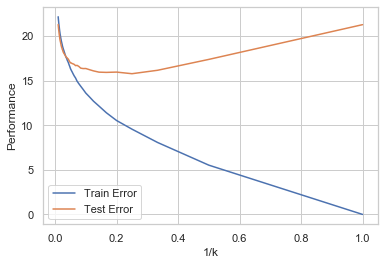

In [59]:
x_axis = []
for k in range(1, 101, 1):
    x_axis.append(1/k)
plt.plot(x_axis, train_errors, label='Train Error')
plt.plot(x_axis, test_errors, label='Test Error')
plt.xlabel('1/k')
plt.ylabel('Performance')
plt.legend(loc='best')

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x_train)
x2 = scaler.fit_transform(x_test)

n_train_errors = []
n_test_errors = []
n_min_error = float('inf')
n_best_k = None
for k in range(1, 101, 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x1,Y_train)
    
    n_train_pred = knn.predict(x1)
    n_test_pred = knn.predict(x2)
    
    n_train_errors.append(mean_squared_error(Y_train, n_train_pred))
    n_test_error = mean_squared_error(Y_test, n_test_pred)
    n_test_errors.append(n_test_error)
    
    if n_test_error < n_min_error:
        n_min_error = n_test_error
        n_best_k = k
        
print('Best K is : ', n_best_k)
print('Smallest error rate:', n_min_error)


Best K is :  11
Smallest error rate: 17.20632202417449


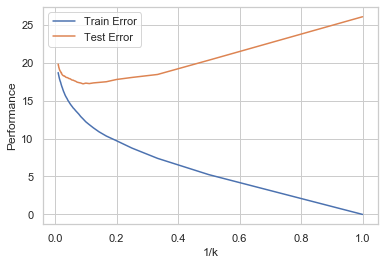

In [62]:
x_axis = []
for k in range(1, 101, 1):
    x_axis.append(1/k)
plt.plot(x_axis, n_train_errors, label='Train Error')
plt.plot(x_axis, n_test_errors, label='Test Error')
plt.xlabel('1/k')
plt.ylabel('Performance')
plt.legend(loc='best')

j) It is obvious that KNN regression is better not only because it has smaller error but also that KNN can capture the non linear relationship better

2. ISLR 2.4.1

(a) A flexible statiscal learning method is better, since big sample size means that we can fit more parameters and small number of predictors means that we can limit model variance.

(b) Worse because it means that the model has low bias and high variance. More likely to overfit?

(c) Better because non linearity means more flexible, so the model's fit would be less restrictive.

(d) Worse because it's more likely to overfit


2. ISLR 2.4.7

In [21]:
a = pd.DataFrame({ 'X1': [0,2,0,0,-1,1], 
                            'X2': [3,0,1,1,0,1], 
                            'X3': [0,0,3,2,1,1],
                            'Y':['Red','Red','Red','Green','Green','Red']})
a

,X1,X2,X3,Y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


a)

In [22]:
def euclidian_dist(x):
    return (np.sum(x**2, axis=1))**0.5

euc_dist = pd.DataFrame({'Dist': euclidian_dist(a[['X1', 'X2', 'X3']])})
df_e = pd.concat([a, euc_dist], axis=1)
df_e

,X1,X2,X3,Y,Dist
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


b) Prediction with k=1 is obs 4/Green (row 5) since it's the the closest neighbor

c) Prediction with k=3 is 1,4,5. But since 1 and 5 are Red, we predict red

d) Small. A smaller value of k results in a more flexible classification model